In [73]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 
import math

In [2]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [11]:
## Load Data use for .s1p data
''' Open data and set up for analysis'''
path = root.directory + '/*.s1p' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=4).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [3]:
## Load Data  use for .csv data
''' Open data and set up for analysis'''
path = root.directory + '/*.csv' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
file_shape = np.array(pd.read_csv(glob.glob(path)[0]).values.shape) # data file size
Header = 4 #Removes string header to work with numpy array
file_shape[0]=file_shape[0]-Header # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname) # uses pandas to open files and keep structure
    data=data.drop(data.index[0:Header]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [4]:
file_list #Used 2 cables A has chip inserted B does not Also took scan of just the connector that was on for all scans

['C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Cable1.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Cable2.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port1A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port1B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port2A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port2B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port3A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port3B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port4A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converted to csv\\Port4B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline/Converte

In [186]:
## Functions
''' Run cell to use functions'''
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
def lowpass_filter(YA,sample_range,filter_size): #YA data set, measured sample range, filter_size arbitrary frequency cutoff based on number of samples
                   
    r=YA.shape[0]                   
    s=sample_range #GHz
    z=np.fft.fftfreq(r)/(2*s)*r
    B=filter_size
    e=int((B)/z[1])
    t=np.linspace(0, s, r)

    fYA=np.fft.rfft(YA)
    filter_e=e
    fYAr=np.zeros(fYA.shape[0])
    fYAl=np.zeros(fYA.shape[0])
    fYAr[:filter_e]=np.real(fYA[:filter_e])
    fYAl[:filter_e]=np.imag(fYA[:filter_e])
    fYA_filt=np.array(fYAr)+np.array(1j*fYAl)
    ifY=np.fft.irfft(fYA_filt)
    return ifY

def list_around(X,rang): # X is a number rang is the range around e.g X=8 rang=2 => list [6,7,8,9,10]
    lis=list(range(int(X)-int(rang),int(X)+int(rang)))
    
    return lis

def Subtract_dB(dataA, dataB): 
    ''' Subtract 2 data sets represented in dB, A-B'''
    
    A= 10**(dataA/10)
    B= 10**(dataB/10)
    
    C= A/B

    dataC= 10*np.log10(C)
    
    return dataC

def rounder(x,n=5):
    '''Rounds either lists or numpy array values to the assigne sig figs n=5 
    Does not get precision correct E.g. 1234567 n=4 => 1235000.0'''
    t=type(x)
#     return t
    string='{:.' + str(n) + 'g}' 
    if type(x) == int or type(x) == float: 
        b = '{:g}'.format(float(string.format(x)))
        c=b
    else:

        b = [float('{:g}'.format(float(string.format(i)))) for i in x]
        c = b
    if t == type(np.ndarray(3)):
        return np.array(c)
    return c

In [177]:
test1=-3
test2=-10
Subtract_dB(test1,test2)

-3.9665289532620474

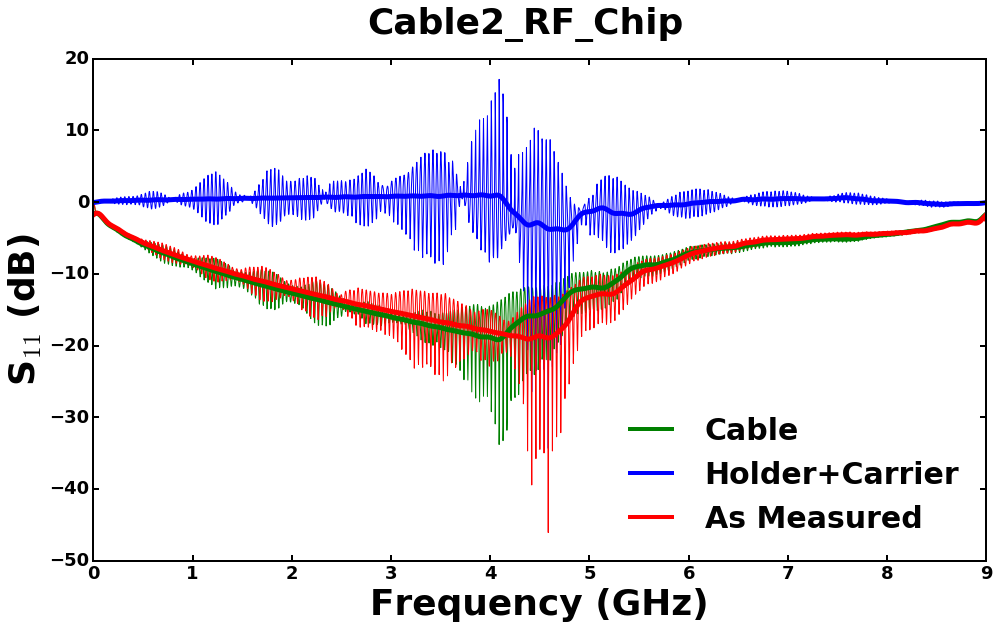

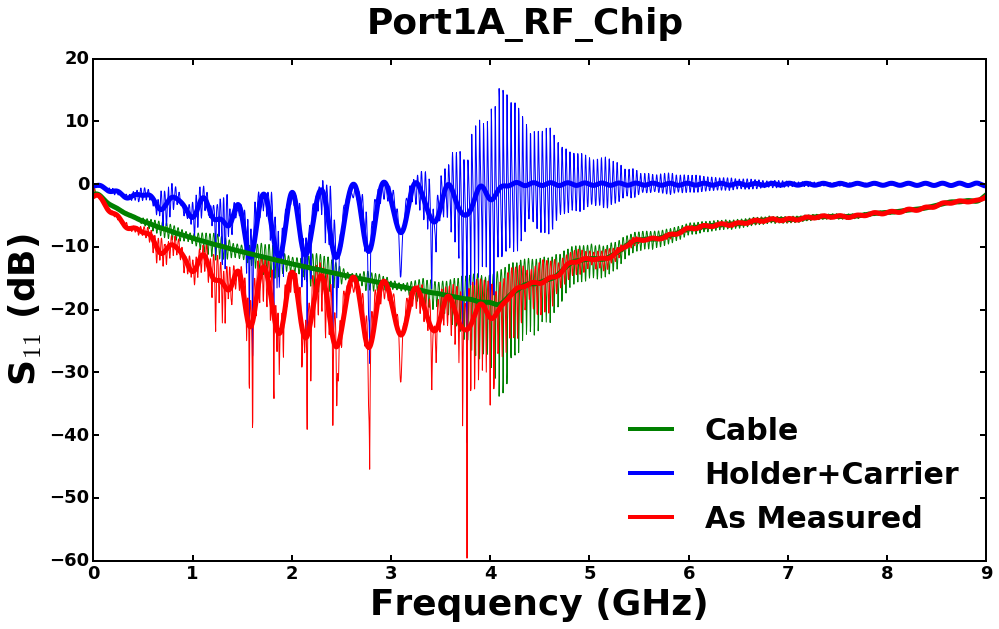

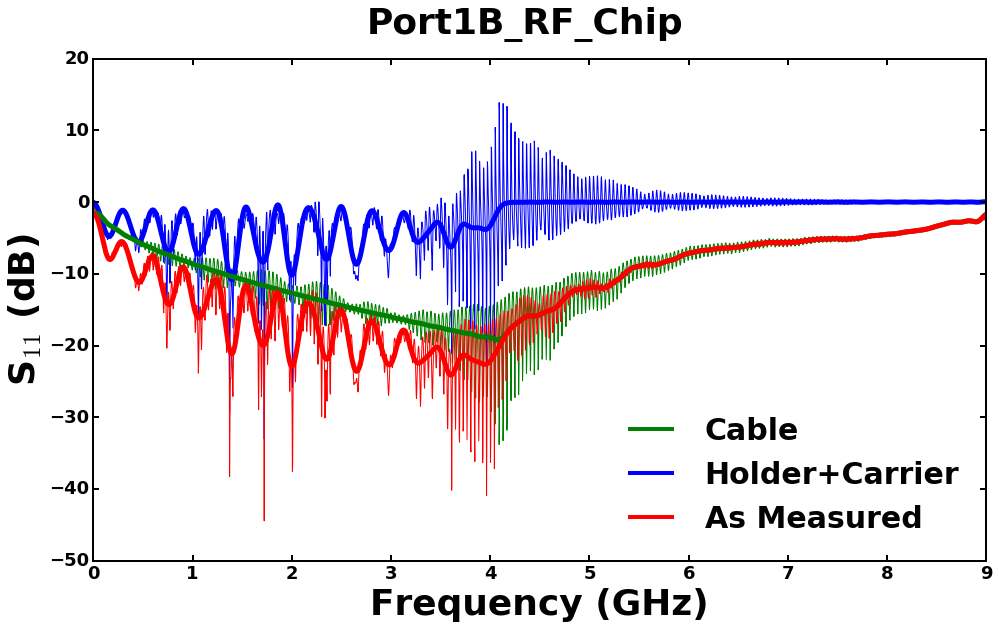

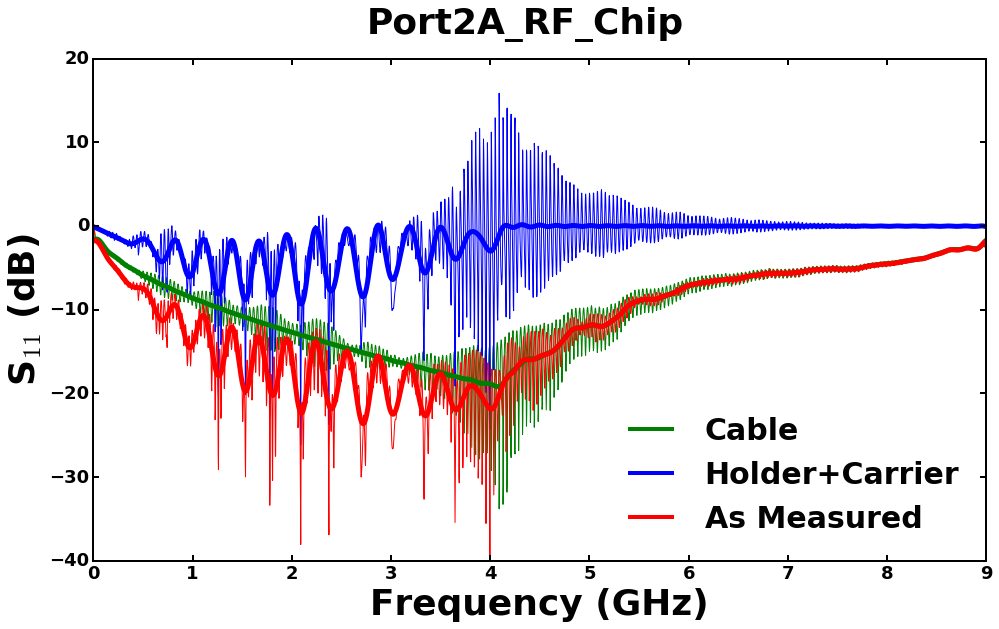

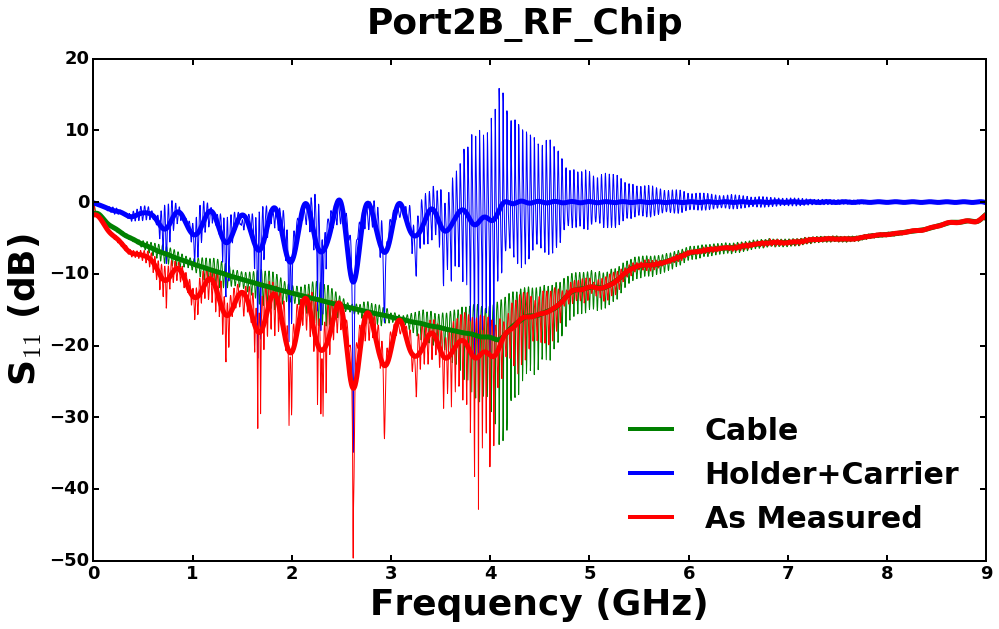

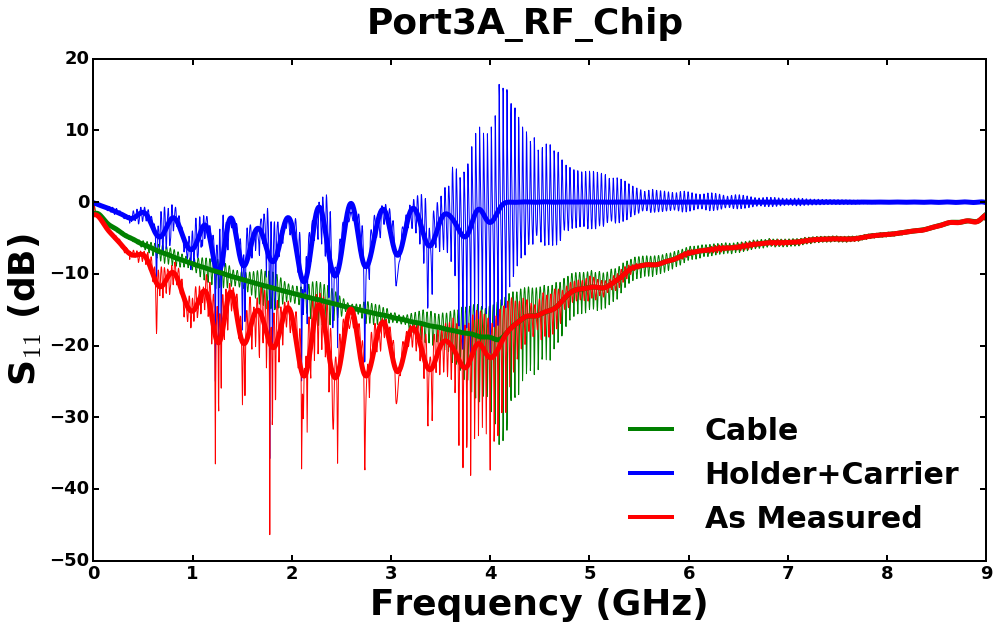

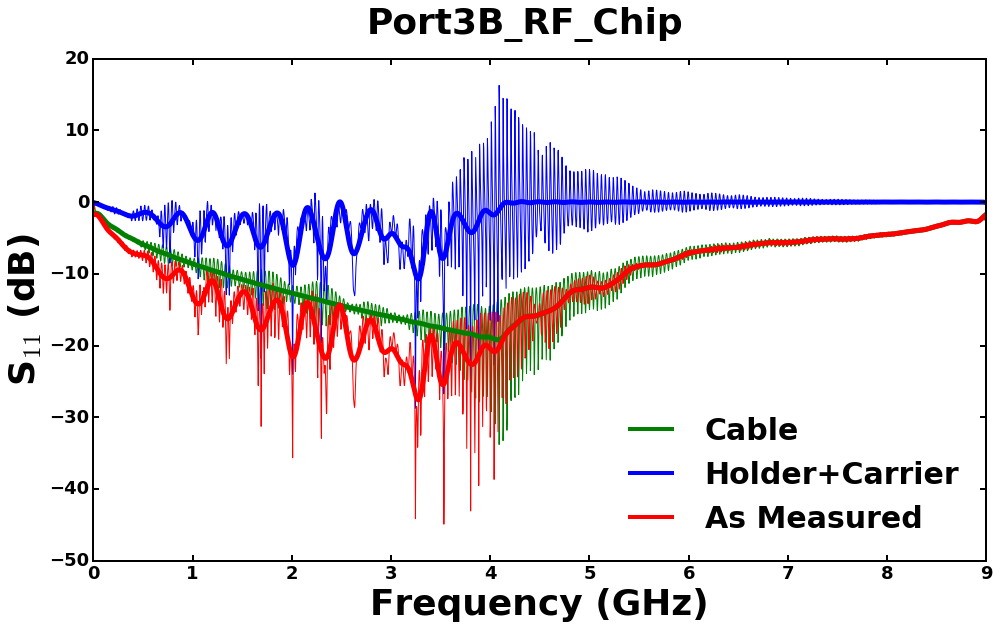

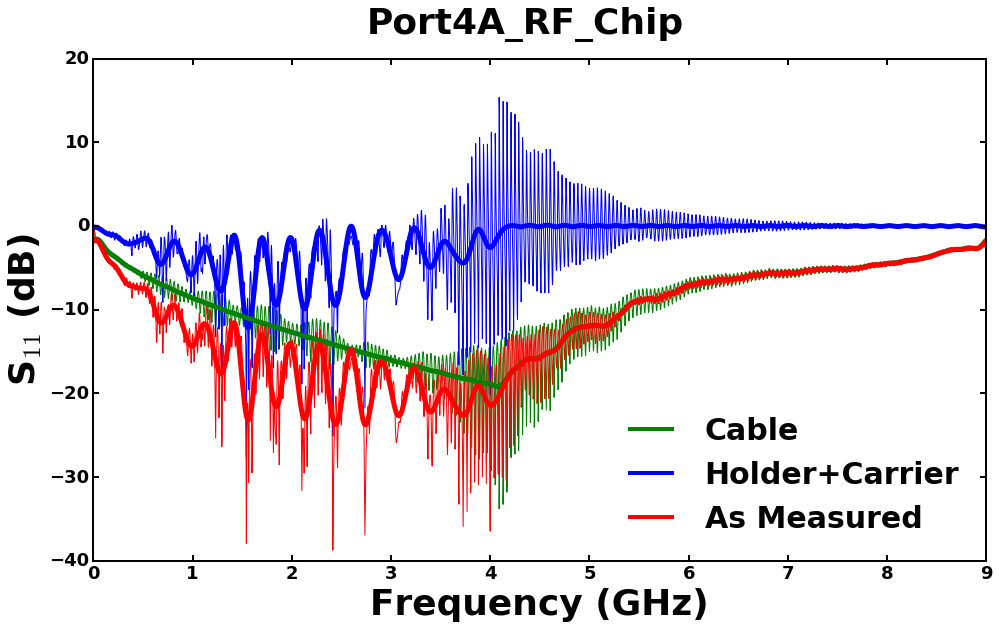

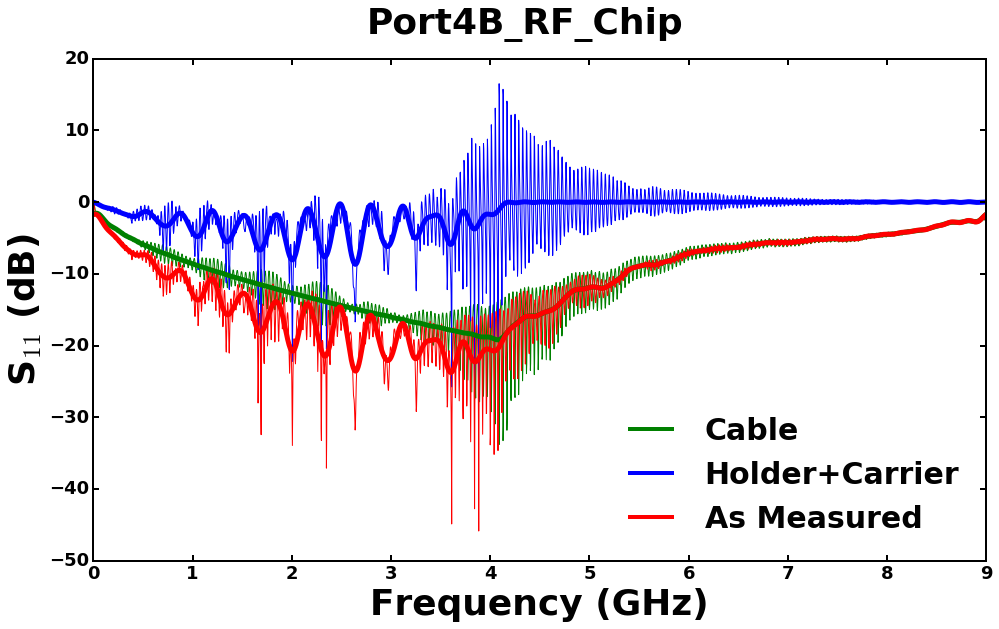

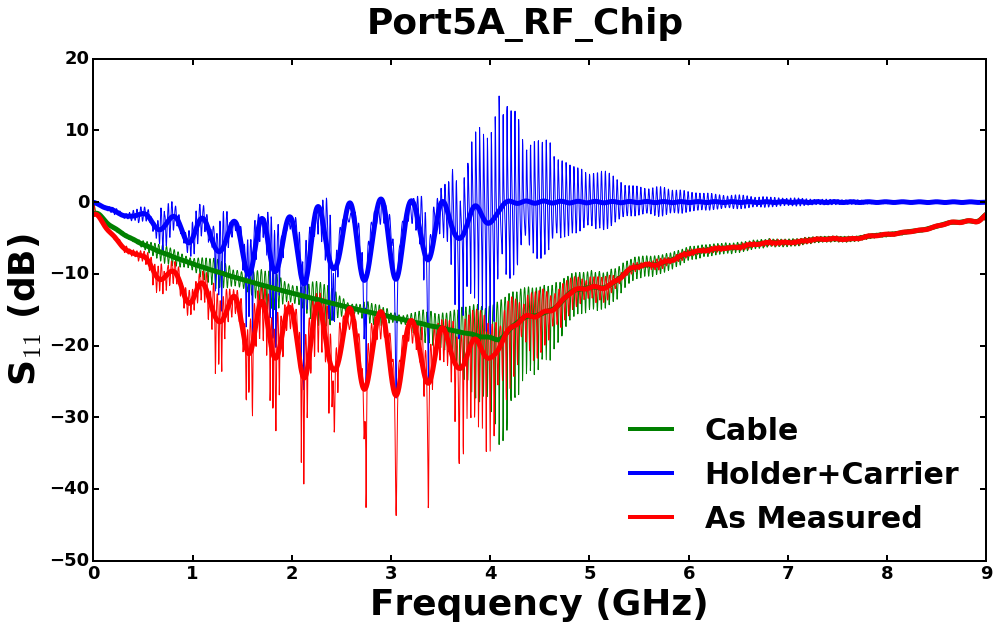

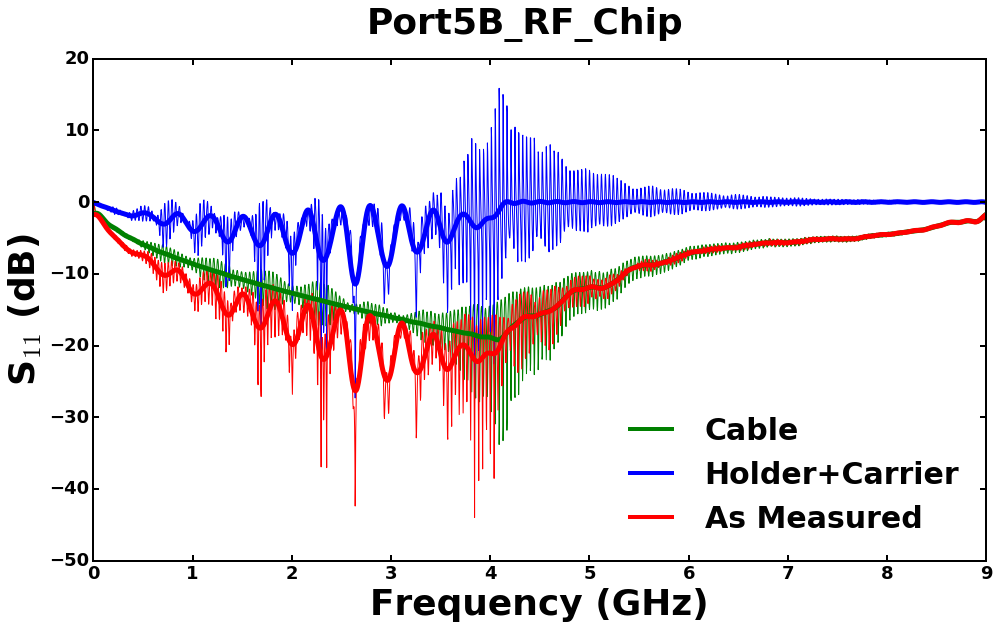

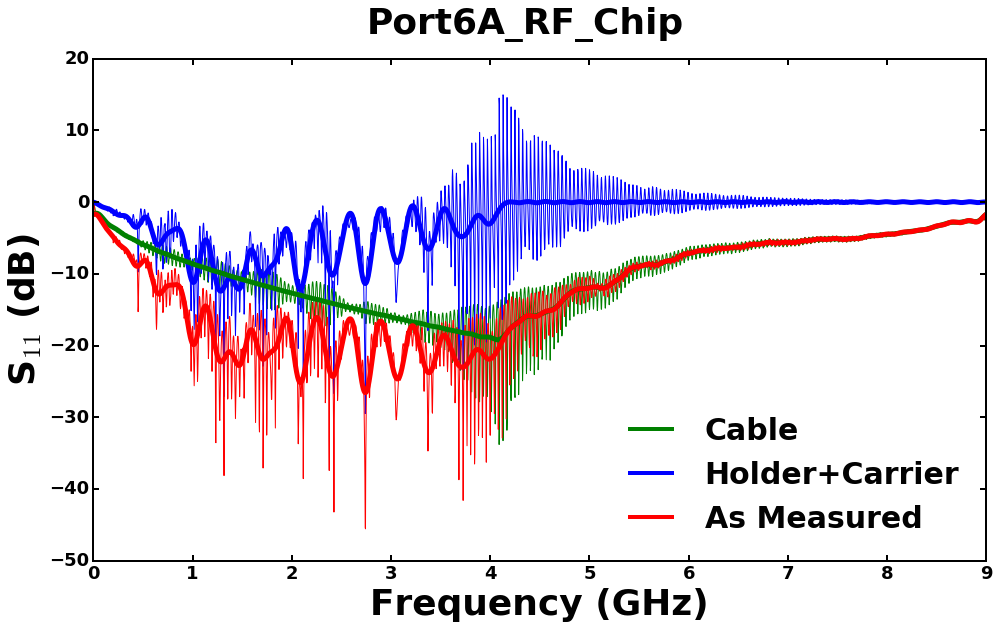

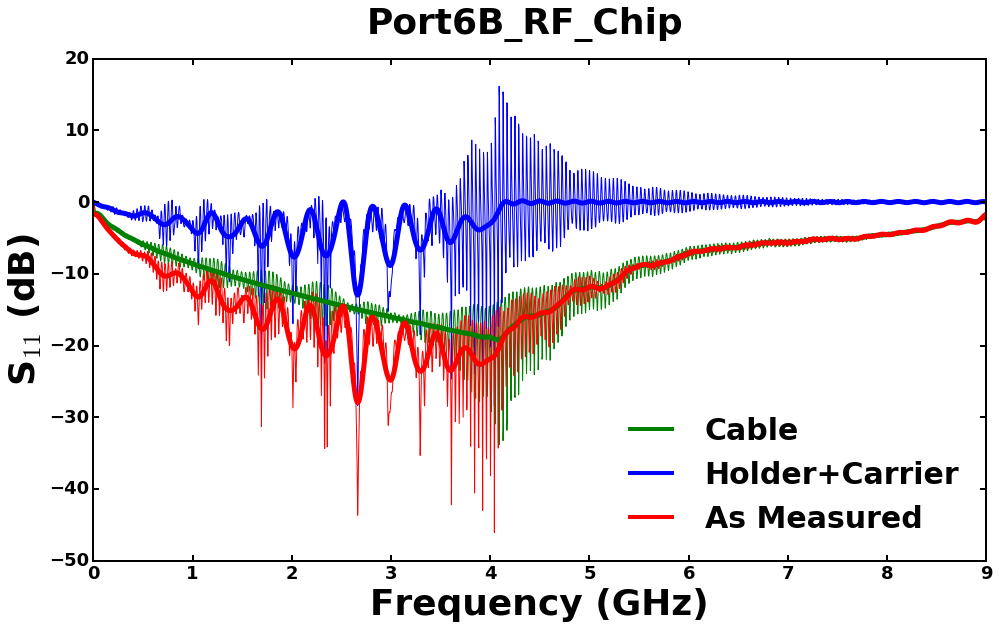

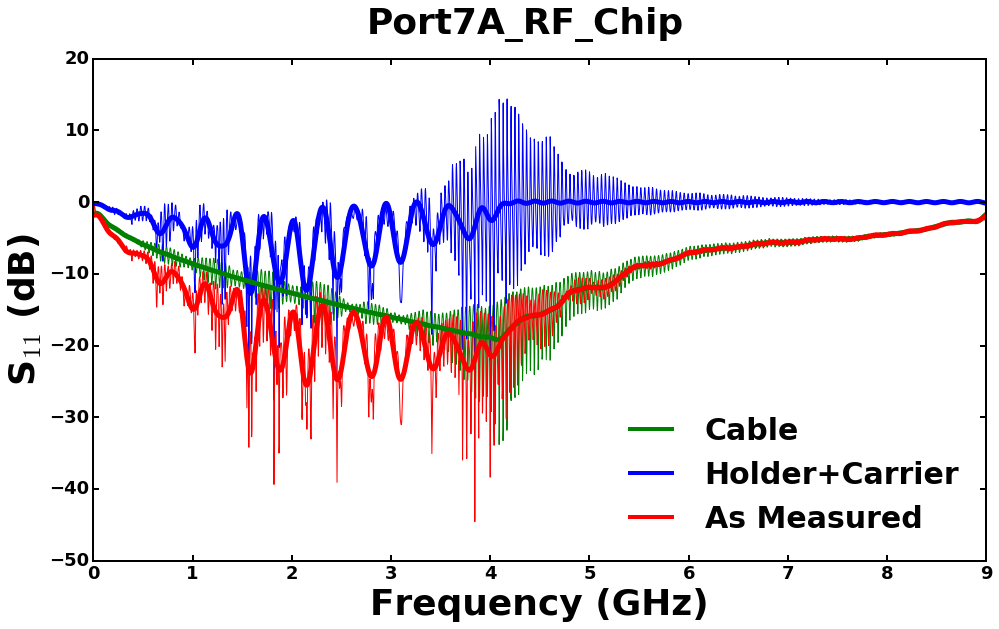

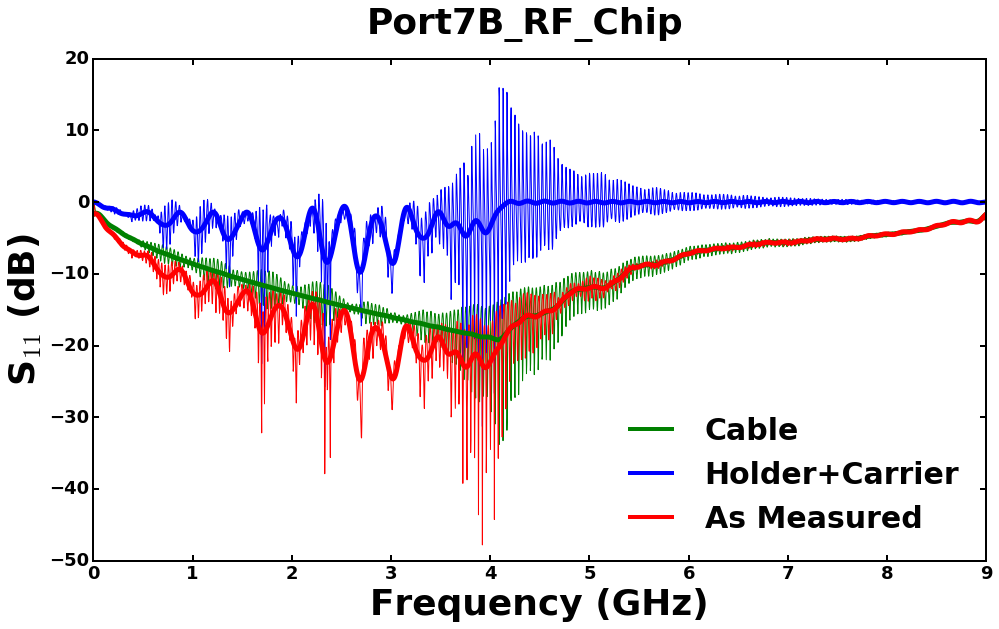

IndexError: index 16 is out of bounds for axis 0 with size 16

In [185]:
## RF data plotting
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''
plot_file=np.arange(data_array.shape[2]-1)+1
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
a=0
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    rfx_cable=data_array[:,0,0]
    rfy_cable=data_array[:,1,0]
    rfy_cable_filt=lowpass_filter(rfy_cable,9,3)
    
    rfx_orig=data_array[:,0,n]
    rfy_orig=data_array[:,1,n]
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    rfy_orig_filt=lowpass_filter(rfy_orig,9,3) #Used for plotting B experiments as data_B_R, R=1,2
    
    rfY_holder=rfy_orig-rfy_cable
    rfY_holder_filt= rfy_orig_filt-rfy_cable_filt
    
    name_fix=plot_file[n]+1
    plot_file_name=str(n+1)
    Data_Name = os.path.basename(file_list[n]).split('.')[0] + '_RF_Chip' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{11}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    fig=plt.plot(rfx_cable,rfy_cable,'g-',linewidth=1, label='Cable')  
    fig=plt.plot(rfx_orig,rfY_holder,'b-',linewidth=1, label='Holder+Carrier')
    fig=plt.plot(rfx_orig,rfy_orig,'r-',linewidth=1, label='As Measured')
    
    fig=plt.plot(rfx_orig[:-1],rfY_holder_filt,'b-',linewidth=5)
    fig=plt.plot(rfx_cable[:-1],rfy_cable_filt,'g-',linewidth=5)
    fig=plt.plot(rfx_orig[:-1],rfy_orig_filt,'r-',linewidth=5)
    
    

    leg=plt.legend(fontsize=30, loc=4, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    #save_loc=root.directory+'/'+'Updated61918'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

In [187]:
## Curate DC chip data before plotting
''' Separates data into new matrixes between A-no chip and B-with chip. Also applies filter'''
for_counter = np.arange(2,num_files-2,2)
a=0
num_cables=7
new_file_shape1=file_shape[1]-1
new_file_shape=np.append(file_shape[0]-1,new_file_shape1)
new_file_shape_orig=np.append(file_shape[0],new_file_shape1)
cable_data_matrix = np.append(new_file_shape,num_cables)
cable_data_matrix_orig = np.append(new_file_shape_orig,num_cables)
data_Ac_1=np.empty(cable_data_matrix)  #preallocates matrix size
data_Ac_1_orig=np.empty(cable_data_matrix_orig)
data_Bc_1=np.empty(cable_data_matrix)
data_Bc_1_orig=np.empty(cable_data_matrix_orig)
data_A_1=np.empty(cable_data_matrix)
data_A_1_orig=np.empty(cable_data_matrix_orig)
data_A_2=np.empty(cable_data_matrix)
data_A_2_orig=np.empty(cable_data_matrix_orig)
data_B_1=np.empty(cable_data_matrix)
data_B_1_orig=np.empty(cable_data_matrix_orig)
data_B_2=np.empty(cable_data_matrix)
data_B_2_orig=np.empty(cable_data_matrix_orig)


for counter in for_counter:
    
    data_Ac_1[:,0,a]=data_array[:-1,0,counter] # Cable x data
    data_Ac_1_orig[:,0,a]=data_array[:,0,counter] # Orig Cable x data
    
    data_Ac_1[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3) # Cable y data
    data_Ac_1_orig[:,1,a]=data_array[:,1,counter] # Orig Cable y data
    
    data_A_1[:,0,a]=data_array[:-1,0,counter] # Cable1 and holder for A series x data   
    data_A_1_orig[:,0,a]=data_array[:,0,counter] # Cable1 and holder for A series x data 
    
    data_A_2[:,0,a]=data_array[:-1,0,counter] # Cable2 and holder for A series x data
    data_A_2_orig[:,0,a]=data_array[:,0,counter] # Cable2 and holder for A series x data  
    
    data_A_1[:,1,a]=Subtract_dB(lowpass_filter(data_array[:,1,counter],9,3),lowpass_filter(data_array[:,1,0],9,3)) # Holder-Cable1 for A series y data 
    data_A_1_orig[:,1,a]=Subtract_dB(data_array[:,1,counter],data_array[:,1,0]) # Orig Holder-Cable1 for A series y data 
    
    data_A_2[:,1,a]=Subtract_dB(lowpass_filter(data_array[:,1,counter],9,3),lowpass_filter(data_array[:,1,1],9,3)) # Holder-Cable2 for A series y data 
    data_A_2_orig[:,1,a]=Subtract_dB(data_array[:,1,counter],data_array[:,1,1]) # Orig Holder-Cable1 for A series y data 
    
    data_B_1[:,0,a]=data_array[:-1,0,counter+1] # Cable1 and holder for A series x data  
    data_B_1_orig[:,0,a]=data_array[:,0,counter+1] # Orig Cable1 and holder for A series x data 
    
    data_B_2[:,0,a]=data_array[:-1,0,counter+1] # Cable2 and holder for A series x data
    data_B_2_orig[:,0,a]=data_array[:,0,counter+1] # Cable2 and holder for A series x data
    
    data_B_1[:,1,a]=Subtract_dB(lowpass_filter(data_array[:,1,counter+1],9,3),lowpass_filter(data_array[:,1,0],9,3)) # Holder-Cable1 for A series y data 
    data_B_1_orig[:,1,a]=Subtract_dB(data_array[:,1,counter+1],data_array[:,1,0]) # Orig Holder-Cable1 for A series y data 
    
    data_B_2[:,1,a]=Subtract_dB(lowpass_filter(data_array[:,1,counter+1],9,3),lowpass_filter(data_array[:,1,1],9,3)) # Holder-Cable2 for A series y data 
    data_B_2_orig[:,1,a]=Subtract_dB(data_array[:,1,counter+1],data_array[:,1,1]) # Orig Holder-Cable2 for A series y data 
    
    a+=1
    


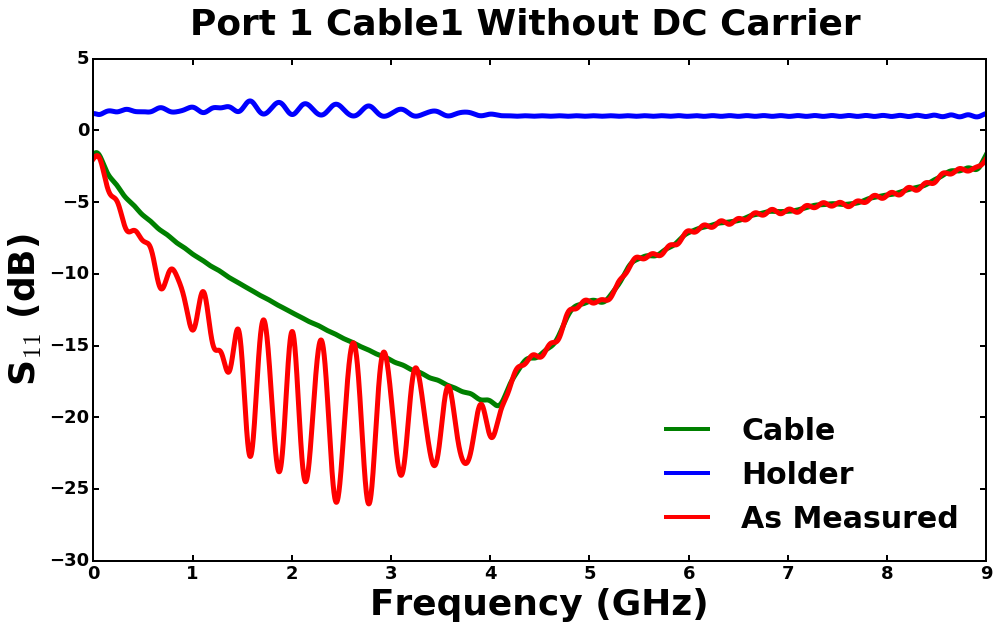

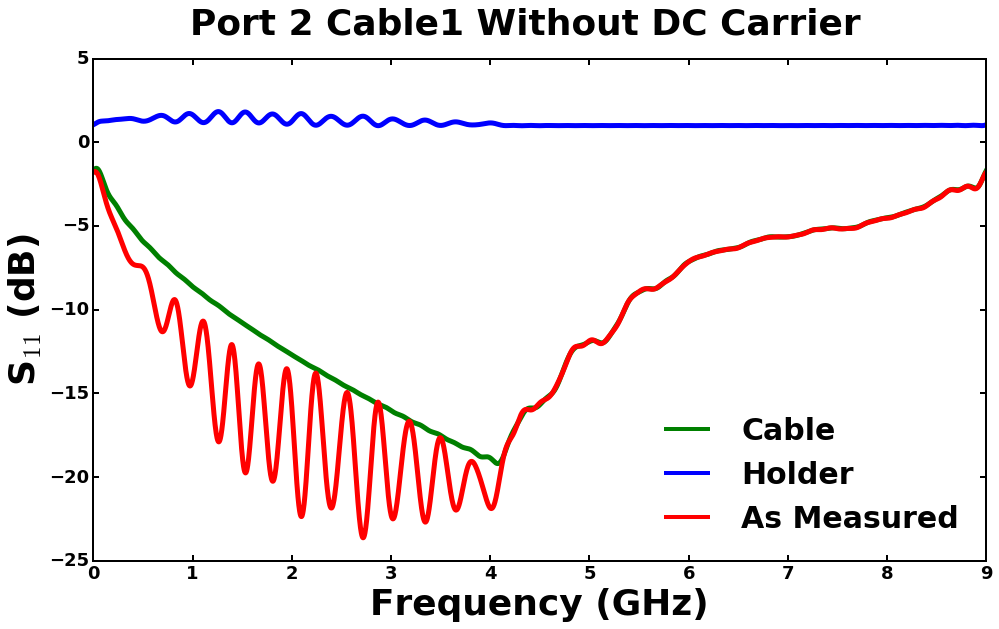

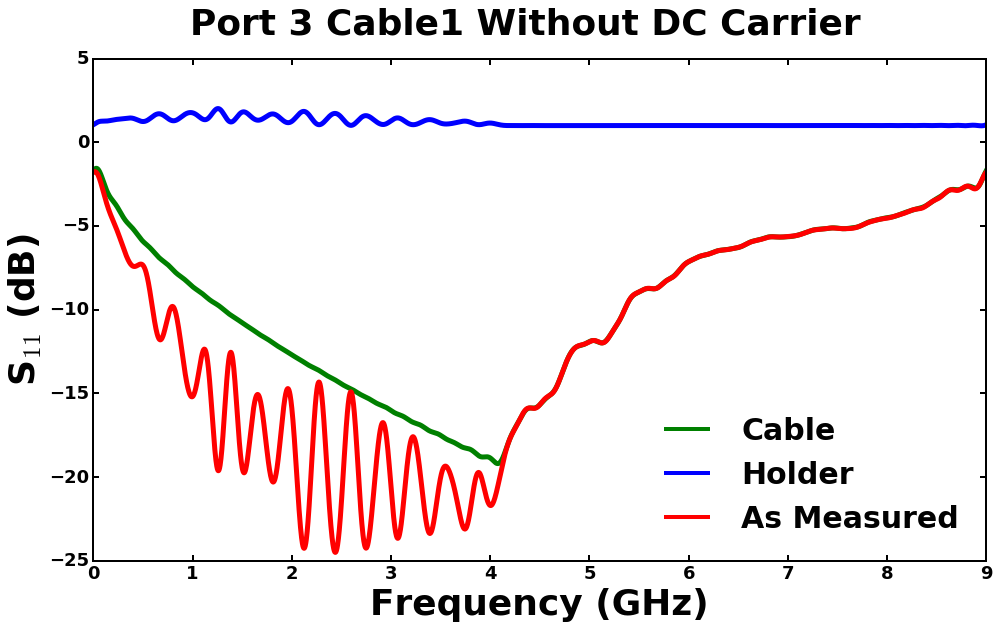

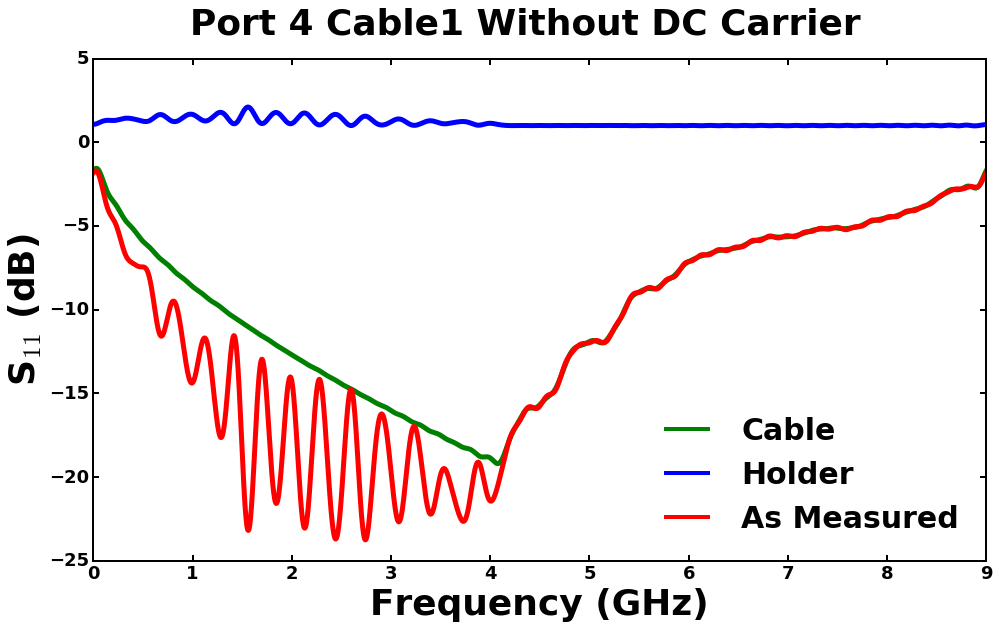

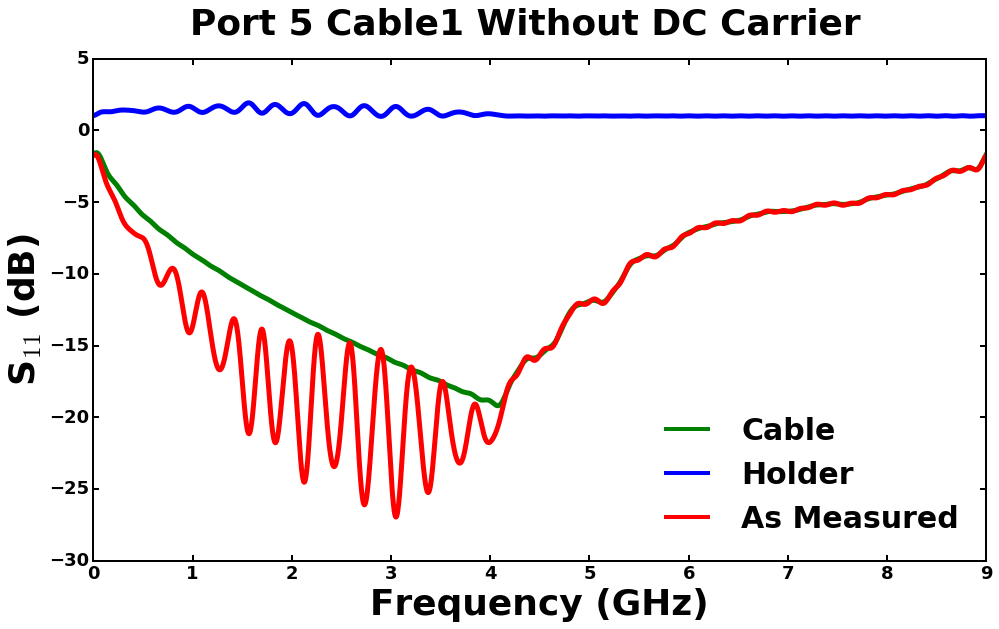

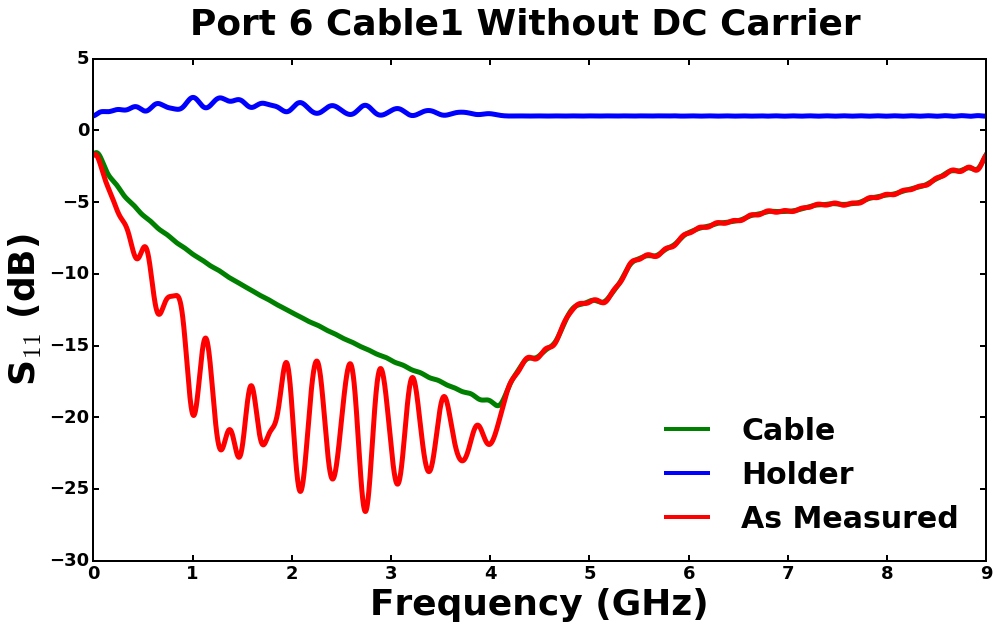

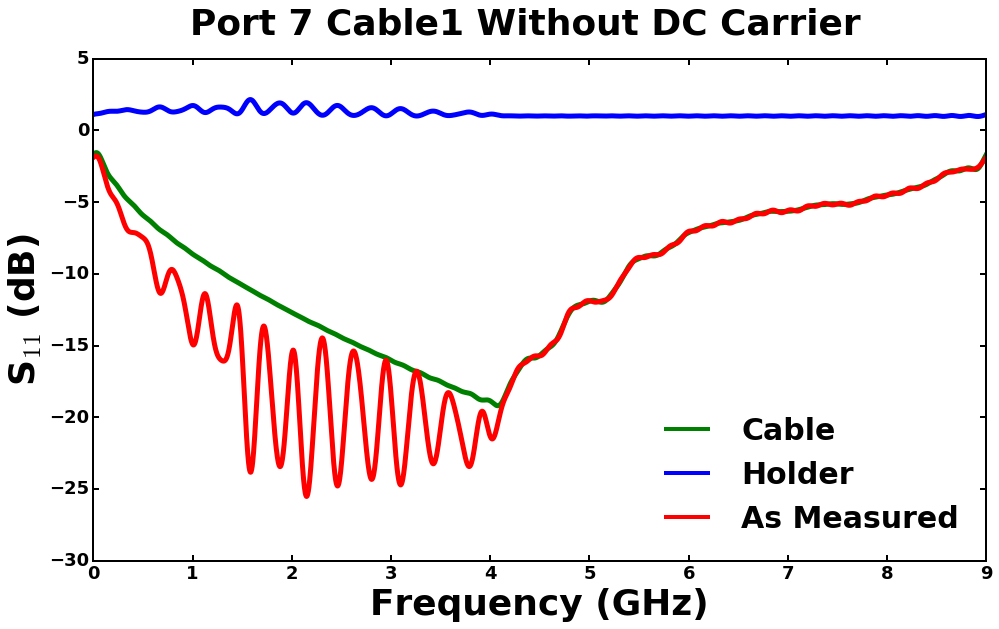

In [191]:
## Plots DC chip data
''' Change indexes or A->B if you want to plot data from no chip-> with chip. Also change from cable 1 to 2 and the naming.
Only took data of all the samples with Cable 1. Just took background of Cable 2'''
plot_file=np.arange(0,7)

data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
data_array_order1=[3,5,7,9,11,13,15] #Used for plotting B experiments

data_holder=np.zeros(cable_data_matrix_orig)
data_holder_filt=np.zeros(cable_data_matrix)

for n in plot_file:
    
    X=data_A_1[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    X_orig=data_A_1_orig[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YA=data_A_1[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2    
    YA_orig=data_A_1_orig[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YB=data_A_1[:,1,plot_file[n]]
    YB_orig=data_A_1_orig[:,1,plot_file[n]]
    
    y1c=data_Ac_1[:,1,plot_file[n]]
    y1c_orig=data_Ac_1_orig[:,1,plot_file[n]]
    
    y1=lowpass_filter(data_array[:,1,0],9,3) #0 for cable 1 and 1 for cable 2 in the z position
    y1_orig=data_array[:,1,0] #0 for cable 1 and 1 for cable 2 in the z position
    
    Y=Subtract_dB(YA,YB) 
    Y_orig=Subtract_dB(YA_orig,YB_orig)
    
    data_holder[:,0,n]=X_orig
    data_holder_filt[:,0,n]=X
    
    data_holder[:,1,n]=YA_orig
    data_holder_filt[:,1,n]=YA
    
    name_fix=plot_file[n]+1
    plot_file_name=str(n+1)
    Data_Name = 'Port ' + plot_file_name + ' Cable1 Without DC Carrier'
    #os.path.basename(file_list[data_array_order1[n]]).split('.')[0] + ' DC WithoutChip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{11}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    fig=plt.plot(X,y1,'g-',linewidth=5, label='Cable')    
    fig=plt.plot(X,YA,'b-',linewidth=5, label='Holder')
    fig=plt.plot(X,y1c,'r-',linewidth=5, label='As Measured')
    
#     fig=plt.plot(X_orig,YA_orig,'b-',linewidth=1)
#     fig=plt.plot(X_orig,y1_orig,'g-',linewidth=1)
#     fig=plt.plot(X_orig,y1c_orig,'r-',linewidth=1)    
    
    
    leg=plt.legend(fontsize=30, loc=4, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    #save_loc='C:\\Users\\kbs1\\Documents\\TEMCarrierApr2018\\TEMCarrierApr2018' + '/' +Data_Name+'.png' #root.directory+'/'+'Updated612518'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

In [190]:
## Curate DC chip data before plotting
''' Separates data into new matrixes between A-no chip and B-with chip. Also applies filter'''
for_counter = np.arange(2,num_files-2,2)
a=0
num_cables=7
new_file_shape1=file_shape[1]-1
new_file_shape=np.append(file_shape[0]-1,new_file_shape1)
new_file_shape_orig=np.append(file_shape[0],new_file_shape1)
cable_data_matrix = np.append(new_file_shape,num_cables)
cable_data_matrix_orig = np.append(new_file_shape_orig,num_cables)
data_Ac_1=np.empty(cable_data_matrix)  #preallocates matrix size
data_Ac_1_orig=np.empty(cable_data_matrix_orig)
data_Bc_1=np.empty(cable_data_matrix)
data_Bc_1_orig=np.empty(cable_data_matrix_orig)
data_A_1=np.empty(cable_data_matrix)
data_A_1_orig=np.empty(cable_data_matrix_orig)
data_A_2=np.empty(cable_data_matrix)
data_A_2_orig=np.empty(cable_data_matrix_orig)
data_B_1=np.empty(cable_data_matrix)
data_B_1_orig=np.empty(cable_data_matrix_orig)
data_B_2=np.empty(cable_data_matrix)
data_B_2_orig=np.empty(cable_data_matrix_orig)


for counter in for_counter:
    
    data_Ac_1[:,0,a]=data_array[:-1,0,counter] # Cable x data
    data_Ac_1_orig[:,0,a]=data_array[:,0,counter] # Orig Cable x data
    
    data_Ac_1[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3) # Cable y data
    data_Ac_1_orig[:,1,a]=data_array[:,1,counter] # Orig Cable y data
    
    data_A_1[:,0,a]=data_array[:-1,0,counter] # Cable1 and holder for A series x data   
    data_A_1_orig[:,0,a]=data_array[:,0,counter] # Cable1 and holder for A series x data 
    
    data_A_2[:,0,a]=data_array[:-1,0,counter] # Cable2 and holder for A series x data
    data_A_2_orig[:,0,a]=data_array[:,0,counter] # Cable2 and holder for A series x data  
    
    data_A_1[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3)/lowpass_filter(data_array[:,1,0],9,3) # Holder-Cable1 for A series y data 
    data_A_1_orig[:,1,a]=data_array[:,1,counter]/data_array[:,1,0] # Orig Holder-Cable1 for A series y data 
    
    data_A_2[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3)/lowpass_filter(data_array[:,1,1],9,3) # Holder-Cable2 for A series y data 
    data_A_2_orig[:,1,a]=data_array[:,1,counter]/data_array[:,1,1] # Orig Holder-Cable1 for A series y data 
    
    data_B_1[:,0,a]=data_array[:-1,0,counter+1] # Cable1 and holder for A series x data  
    data_B_1_orig[:,0,a]=data_array[:,0,counter+1] # Orig Cable1 and holder for A series x data 
    
    data_B_2[:,0,a]=data_array[:-1,0,counter+1] # Cable2 and holder for A series x data
    data_B_2_orig[:,0,a]=data_array[:,0,counter+1] # Cable2 and holder for A series x data
    
    data_B_1[:,1,a]=lowpass_filter(data_array[:,1,counter+1],9,3)/lowpass_filter(data_array[:,1,0],9,3) # Holder-Cable1 for A series y data 
    data_B_1_orig[:,1,a]=data_array[:,1,counter+1]/data_array[:,1,0] # Orig Holder-Cable1 for A series y data 
    
    data_B_2[:,1,a]=lowpass_filter(data_array[:,1,counter+1],9,3)/lowpass_filter(data_array[:,1,1],9,3) # Holder-Cable2 for A series y data 
    data_B_2_orig[:,1,a]=data_array[:,1,counter+1]/data_array[:,1,1] # Orig Holder-Cable2 for A series y data 
    
    a+=1

In [16]:
a

array([-0.62029031, -0.23705771, -0.6647843 ])

In [17]:
b

array([-0.62029031, -0.23705771, -0.6647843 ])

In [30]:
np.set_printoptions(threshold=np.nan)
a=10**lowpass_filter(data_array[:,1,counter],9,3)/10
b=np.log10(a)

In [31]:
b

array([ -2.87935172,  -2.85973535,  -2.84189858,  -2.82601575,
        -2.81225794,  -2.8007916 ,  -2.79177726,  -2.78536819,
        -2.78170913,  -2.78093497,  -2.78316956,  -2.78852456,
        -2.79709825,  -2.80897462,  -2.82422232,  -2.84289393,
        -2.86502515,  -2.89063425,  -2.91972155,  -2.95226914,
        -2.98824061,  -3.027581  ,  -3.07021695,  -3.11605685,
        -3.16499129,  -3.2168936 ,  -3.27162049,  -3.32901293,
        -3.38889707,  -3.45108539,  -3.51537791,  -3.58156352,
        -3.64942144,  -3.71872275,  -3.78923204,  -3.86070908,
        -3.93291058,  -4.00559199,  -4.07850928,  -4.15142082,
        -4.22408911,  -4.29628268,  -4.36777775,  -4.43836   ,
        -4.50782613,  -4.57598549,  -4.64266145,  -4.70769276,
        -4.77093477,  -4.83226046,  -4.8915614 ,  -4.94874851,
        -5.0037526 ,  -5.05652489,  -5.10703718,  -5.15528198,
        -5.20127237,  -5.24504172,  -5.28664321,  -5.32614925,
        -5.36365059,  -5.39925539,  -5.43308809,  -5.46